# Aliasing and False Contouring
----
`Roll: CS20B1016, Name: V Nagasai`

----

**<u>Problem statement</u>**:
Download the leaning tower of the PISA image and find the angle of inclination using
appropriate rotations with bilinear interpolation.

**<u>Note</u>**:
The rotation must be performed using both user defined and predefined functions.

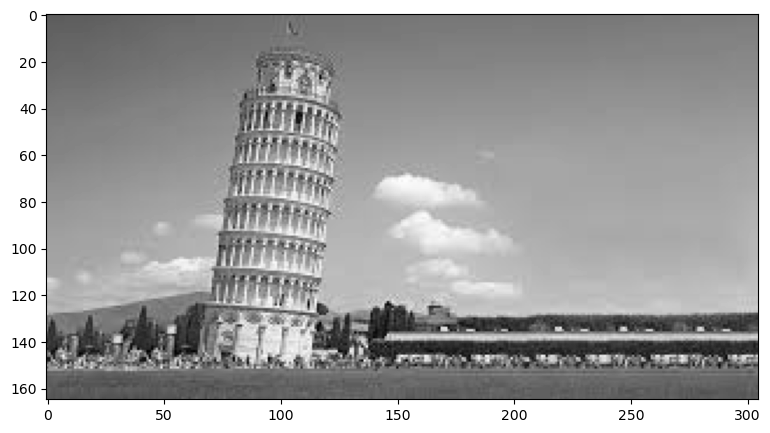

In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("PISA.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 5))
plt.imshow(img, cmap="gray")
plt.show()

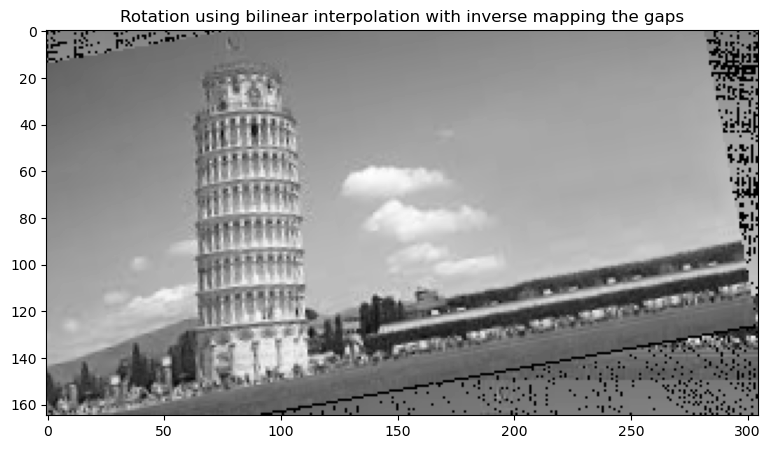

In [132]:
def rotate_image_user_with_inverse_mapping(img: np.ndarray, theta=0, center=None):
	theta = theta/180.0 *np.pi #Converting the angle to radians
	h, w = img.shape
	if center == None:
		center = (h/2, w/2)
	rotated_image = np.empty((h, w))
	cos, sin = np.cos(theta), np.sin(theta)
	for i in range(h):
		for j in range(w):
			x, y = i - center[0], j - center[1]
			new_x, new_y = x*cos + y*sin + center[0], -x*sin + y*cos + center[1]
			if (new_x < 0 or new_x >= h or new_y < 0 or new_y >= w):
				inverse_x, inverse_y = new_x - center[0], new_y - center[1]
				new_inverse_x, new_inverse_y = inverse_x*cos - inverse_y*sin, inverse_x*sin + inverse_y*cos
				x_f, x_c = int(np.floor(new_inverse_x)), min(int(np.ceil(new_inverse_x)), h-1)
				y_f, y_c = int(np.floor(new_inverse_y)), min(int(np.ceil(new_inverse_y)), w-1)
				if x_f == x_c and y_f == y_c:
					pixel = img[x_f, y_f]
				elif x_f == y_f:
					p1, p2 = img[x_f, y_f], img[x_f, y_c]
					pixel = p1*(y_c - new_inverse_y) + p2*(new_inverse_y - y_f)
				elif y_f == y_c:
					p1, p2 = img[x_f, y_f], img[x_c, y_f]
					pixel = p1*(x_c -  new_inverse_x) + p2*(new_inverse_x - x_f)
				else:
					a = img[x_f][y_f]
					b = img[x_f][y_c]
					c = img[x_c][y_f]
					d = img[x_c][y_c]
					p1 = a*(y_c - new_inverse_y) + b*(new_inverse_y - y_f)
					p2 = c*(y_c - new_inverse_y) + d*(new_inverse_y - y_f)
					pixel = p1*(x_c - new_inverse_x) + p2*(new_inverse_x - x_f) 
			else:
				x_floor, x_ceil = int(np.floor(new_x)), min(int(np.ceil(new_x)), h-1)
				y_floor, y_ceil = int(np.floor(new_y)), min(int(np.ceil(new_y)), w-1)
				if x_floor == x_ceil and y_floor == y_ceil:
					pixel = img[x_floor, y_floor]
				elif x_floor == y_floor:
					p1, p2 = img[x_floor, y_floor], img[x_floor, y_ceil]
					pixel = p1*(y_ceil - new_y) + p2*(new_y - y_floor)
				elif y_floor == y_ceil:
					p1, p2 = img[x_floor, y_floor], img[x_ceil, y_floor]
					pixel = p1*(x_ceil -  new_x) + p2*(new_x - x_floor)
				else:
					a = img[x_floor][y_floor]
					b = img[x_floor][y_ceil]
					c = img[x_ceil][y_floor]
					d = img[x_ceil][y_ceil]
					p1 = a*(y_ceil - new_y) + b*(new_y - y_floor)
					p2 = c*(y_ceil - new_y) + d*(new_y - y_floor)
					pixel = p1*(x_ceil - new_x) + p2*(new_x - x_floor) 
			rotated_image[i, j] = pixel
	return rotated_image


rotated_image = rotate_image_user_with_inverse_mapping(img, 10.2, center=(150, 90))
plt.figure(figsize=(10, 5))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotation using bilinear interpolation with inverse mapping the gaps")
plt.show()

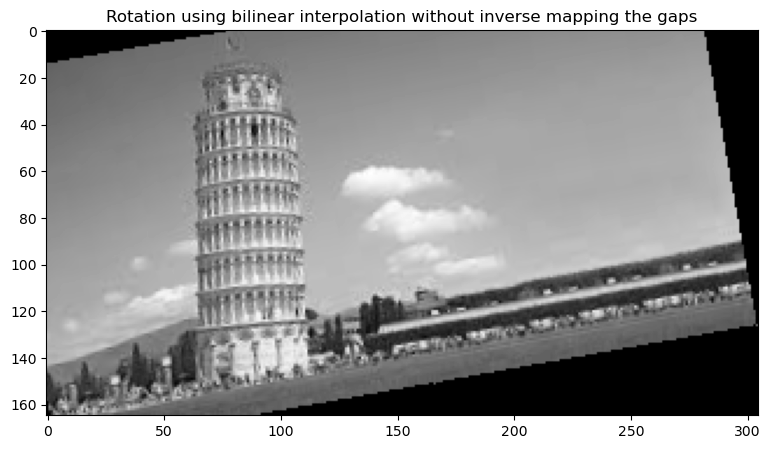

In [134]:
def rotate_image_user_without_inverse_mapping(img: np.ndarray, theta=0, center=None):
	theta = theta/180.0 *np.pi #Converting the angle to radians
	h, w = img.shape
	if center == None:
		center = (h/2, w/2)
	rotated_image = np.empty((h, w))
	cos, sin = np.cos(theta), np.sin(theta)
	for i in range(h):
		for j in range(w):
			x, y = i - center[0], j - center[1]
			new_x, new_y = x*cos + y*sin + center[0], -x*sin + y*cos + center[1]
			if (new_x < 0 or new_x >= h or new_y < 0 or new_y >= w):
				pixel = 0
			else:
				x_floor, x_ceil = int(np.floor(new_x)), min(int(np.ceil(new_x)), h-1)
				y_floor, y_ceil = int(np.floor(new_y)), min(int(np.ceil(new_y)), w-1)
				if x_floor == x_ceil and y_floor == y_ceil:
					pixel = img[x_floor, y_floor]
				elif x_floor == y_floor:
					p1, p2 = img[x_floor, y_floor], img[x_floor, y_ceil]
					pixel = p1*(y_ceil - new_y) + p2*(new_y - y_floor)
				elif y_floor == y_ceil:
					p1, p2 = img[x_floor, y_floor], img[x_ceil, y_floor]
					pixel = p1*(x_ceil -  new_x) + p2*(new_x - x_floor)
				else:
					a = img[x_floor][y_floor]
					b = img[x_floor][y_ceil]
					c = img[x_ceil][y_floor]
					d = img[x_ceil][y_ceil]
					p1 = a*(y_ceil - new_y) + b*(new_y - y_floor)
					p2 = c*(y_ceil - new_y) + d*(new_y - y_floor)
					pixel = p1*(x_ceil - new_x) + p2*(new_x - x_floor) 
			rotated_image[i, j] = pixel
	return rotated_image


rotated_image = rotate_image_user_without_inverse_mapping(img, 10.2, center=(150, 90))
plt.figure(figsize=(10, 5))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotation using bilinear interpolation without inverse mapping the gaps")
plt.show()

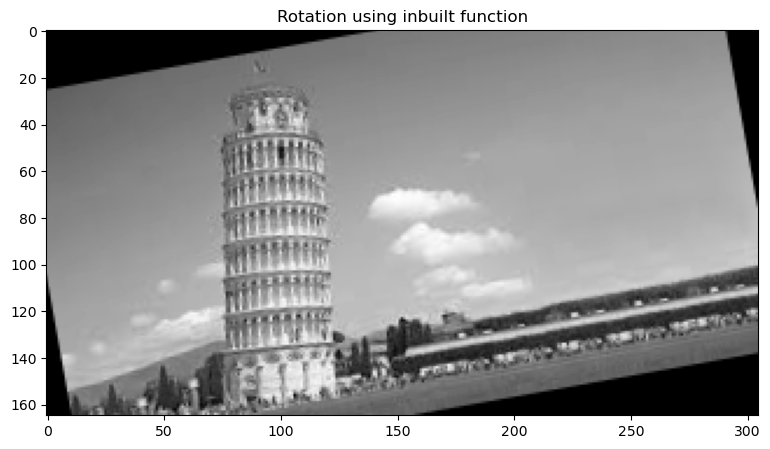

In [147]:
def rotate_image_user_inbuilt(img: np.ndarray,theta,center=None):
	h, w = img.shape
	if center == None:
		center = (w/2, h/2)
	rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=theta, scale=1)
	rotated_image = cv2.warpAffine(
    src=img, M=rotate_matrix, dsize=(w, h))
	return rotated_image
  

rotated_image = rotate_image_user_inbuilt(img, 10.2, center=(150, 90))
plt.figure(figsize=(10, 5))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotation using inbuilt function")
plt.show()

By the experiments, we have found that nearly `10.2` degree is the inclination from vertical y-axis in clock wise direction, as we rotated along x-axis in anti-clock wise direction.